# Aufgabe 1
Berechnen Sie das Populationswachstum nach dem Modell von Verhulst mit K=1, r=0.1 mit Hilfe von Python. 
Verwenden Sie verschiedene Anfangsbedingungen N0
•	N0 > K
•	N0 < K  und N0 > K/2
•	N0 < K/2
Beschreiben Sie die qualitativen Unterschiede der entstehenden Kurvenverläufe. 

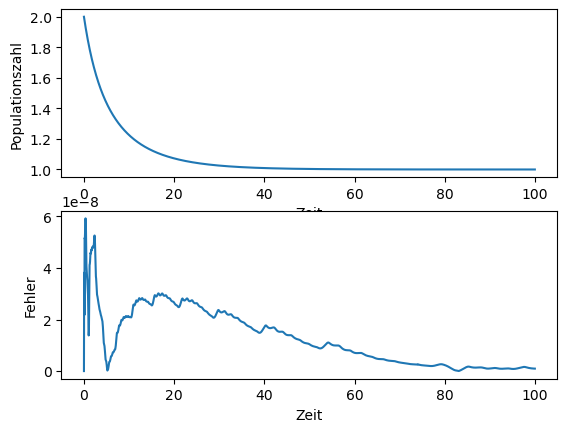

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
def f(y, t, params):
    N = y # unpack current values of y
    r, K = params # unpack parameters
    deriv = r*N*(1-N/K)
    return deriv
# Parameters
r=0.1;
K=1;
# Bundle parameters for ODE solver
params = [r,K]
# Make time array for solution
tStop = 100.
tInc = 0.05
t = np.arange(0., tStop, tInc)
y0=2.;
# Call the ODE solver
psoln = odeint(f, y0, t, args=(params,))
# Plot results
fig = plt.figure()
# Plot population size as a function of time
ax1 = fig.add_subplot(211)
ax1.plot(t, psoln[:,0])
ax1.set_xlabel('Zeit')
ax1.set_ylabel('Populationszahl')
# Plot error against analytical solution
ax2 = fig.add_subplot(212)
ax2.plot(t, abs(psoln[:,0]- (y0*K*np.exp(r*t)) /
(K + y0*(np.exp(r*t) - 1))))
ax2.set_xlabel('Zeit')
ax2.set_ylabel('Fehler')
plt.show()

# Aufgabe 2
Berechnen Sie die Sorptionskinetik mit einer nicht-linearen Freundlich Gleichung mit den Parametern $k_f$=10; $k_b$=1; theta=0.3; rho_b=1.3; b=0.5
für die Anfangsbedingung $C_{s,0} = 0$ und verschiedene Werte für $C_{l,0}$: 0.5, 1, 5, 10, 20. 
Ab welchem Zeitpunkt ist jeweils das Gleichgewicht erreicht? 
Verwenden Sie Python und plotten Sie die 5 verschiedenen Kinetiken. Plotten Sie die Freundlich-Isotherme aufgrund der 5 verschiedenen Wertepaare ($C_{l,equil}$, $C_{s,equil}$) bei Gleichgewicht. 

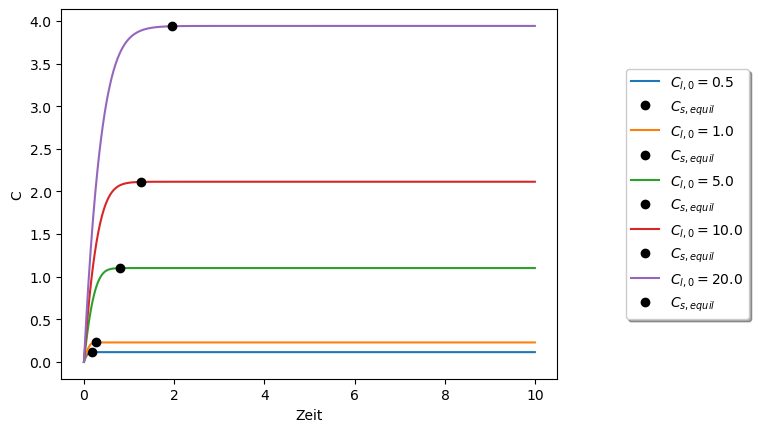

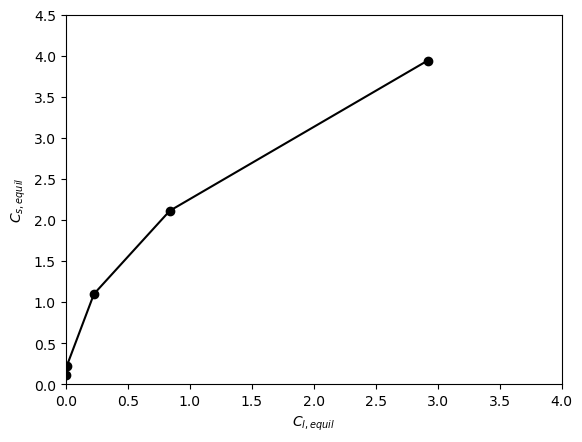

Gleichgewichtskonzentrationen und Zeit
C_l im Gleichgewicht
 [2.47530819e-03 9.80486407e-03 2.27744249e-01 8.39202169e-01
 2.91796067e+00]
C_s im Gleichgewicht
 [0.11481339 0.22850657 1.10128979 2.11403027 3.94200908]
Zeit nach der das Gleichgewicht erreicht wird:
Cl0:  [0.5, 1, 5, 10, 20] 
 t_eq: [0.18 0.27 0.8  1.27 1.94]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
def f(y, t, params):
    Cl, Cs = y # unpack current values of y
    kf, kb, b, rhob, theta = params # unpack parameters
    derivs = [-kf*Cl**b + rhob/theta*kb*Cs, # list of dy/dt=f functions
    kf*theta/rhob*Cl**b - kb*Cs]
    return derivs
# Parameters
kf=10; kb=1; rhob=1.3; theta=0.3; b=0.5
# Initial values
Cl0v = [0.5, 1, 5, 10, 20];Cs0 = 0
plt.ion()
Clv = np.zeros(len(Cl0v))
Csv = np.zeros(len(Cl0v))
t_eq=np.zeros(len(Cl0v))
# Make time array for solution
tStop = 10.
tInc = 0.01
t = np.arange(0., tStop, tInc)
# Bundle parameters for ODE solver
params = [kf, kb, b, rhob, theta]
# Schwellenwert für die zulässige relative Abweichung zum Gleichgewichtswert
CS_thr_rel=1e-3  
for i in range(len(Cl0v)):
    Cl0=Cl0v[i]
    # Bundle initial conditions for ODE solver
    y0 = [Cl0, Cs0]
    # Call the ODE solver
    psoln = odeint(f, y0, t, args=(params,))
    Clv[i]=psoln[-1,0]
    Csv[i]=psoln[-1,1]
    # find the index where the equkibrium concentration has been reached
    e_idx=np.where((Csv[i]-psoln[:,1])<CS_thr_rel*Csv[i])
    t_eq[i]=t[np.min(e_idx)]
    #plt.plot(t, psoln[:,0],label='C$_l$')
    plt.plot(t, psoln[:,1],label='$C_{l,0}=$'+"{:2.1f}".format(Cl0v[i]))
    plt.plot(t_eq[i], psoln[np.min(e_idx),1],'ok',label='$C_{s,equil}$')
plt.xlabel('Zeit')
plt.ylabel('C')
plt.legend(loc='center right', shadow=True, bbox_to_anchor=(1.4, 0.5))
plt.ioff()
plt.show()
# Sorptionsisotherme
plt.figure(2)
plt.plot(Clv,Csv,'ko-')
plt.axis([0,4,0,4.5])
plt.xlabel("$C_{l,equil}$")
plt.ylabel("$C_{s,equil}$")
plt.show()
print("Gleichgewichtskonzentrationen und Zeit")
print("C_l im Gleichgewicht\n",Clv)
print("C_s im Gleichgewicht\n",Csv)
print("Zeit nach der das Gleichgewicht erreicht wird:")
print("Cl0: ",Cl0v,"\n","t_eq:",t_eq)

# Aufgabe 3
Berechnen Sie dasselbe Modell wie oben aber mit der zusätzlichen Annahme, dass es eine zweite Art von Sorptionsplätzen gibt, die folgende Parameter aufweist: kf2=2; kb2=0.3.

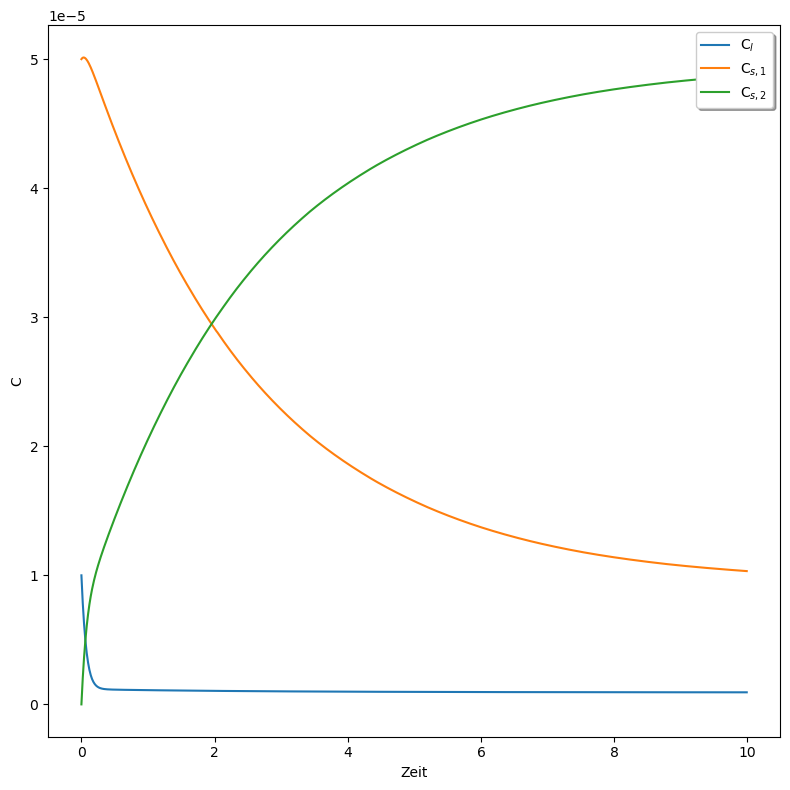

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
def f(y, t, params):
    Cl, Cs1, Cs2 = y # unpack current values of y
    kf, kb, b, rhob, theta,kf2,kb2 = params # unpack parameters
    derivs = [-kf*Cl**b + rhob/theta*kb*Cs1-kf2*Cl**b + rhob/theta*kb2*Cs2, # list of dy/dt=f functions
    kf*theta/rhob*Cl**b - kb*Cs1,
    kf2*theta/rhob*Cl**b - kb2*Cs2]
    return derivs
# Parameters
kf=0.5; kb=0.4; b=0.85; rhob=1.5; theta=0.3; kf2=2; kb2=0.3;
# Initial values
Cl0 = 1e-5;
Cs10 = 1e-5;
Cs20 = 0;
# Bundle parameters for ODE solver
params = [kf, kb, b, rhob, theta,kf2,kb2]
# Bundle initial conditions for ODE solver
y0 = [Cl0, Cs10, Cs20]
# Make time array for solution
tStop = 10.
tInc = 0.01
t = np.arange(0., tStop, tInc)
# Call the ODE solver
psoln = odeint(f, y0, t, args=(params,))
# Plot results
fig = plt.figure(1, figsize=(8,8))
# Plot as a function of time
plt.plot(t, psoln[:,0],label='C$_l$')
plt.plot(t, psoln[:,1]*rhob/theta,label='C$_{s,1}$')
plt.plot(t, psoln[:,2]*rhob/theta,label='C$_{s,2}$')
plt.xlabel('Zeit')
plt.ylabel('C')
plt.legend(loc='upper right', shadow=True)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.tight_layout()
plt.show()